# Support Vector Machines 
## Instructions
1. Use any dataset from https://archive.ics.uci.edu/datasets?Task=Clustering&skip=0&take=10&sort=desc&orderBy=NumHits&search=&Area=Biology
2. Each student should have a unique dataset otherwise no points will be given, so you need to discuss with your classmate.

**TASK: Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample**

In [1]:
from ucimlrepo import fetch_ucirepo 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# fetch dataset 
land_mines = fetch_ucirepo(id=763) 
  
# data (as pandas dataframes) 
X = land_mines.data.features 
y = land_mines.data.targets 

df = pd.DataFrame(X, columns=land_mines.data.feature_names)
df = df.dropna().select_dtypes(include=[np.number])

# Combine features and targets into one DataFrame
df = pd.concat([X, y], axis=1)

# Rename the target column for clarity
df.rename(columns={df.columns[-1]: 'M'}, inplace=True)

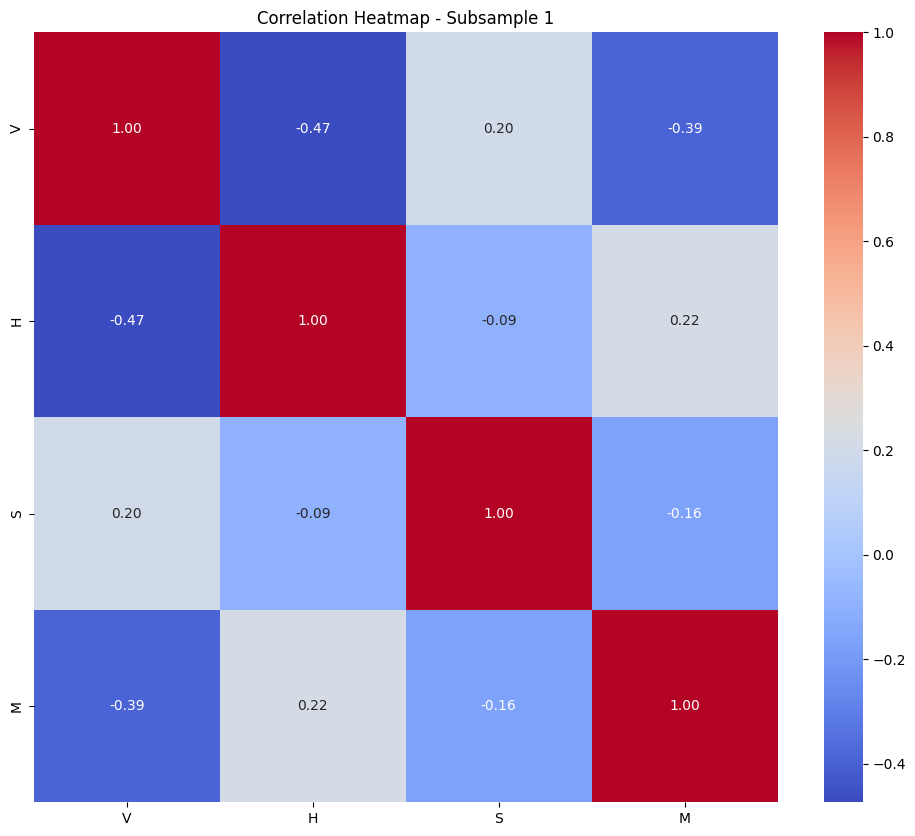

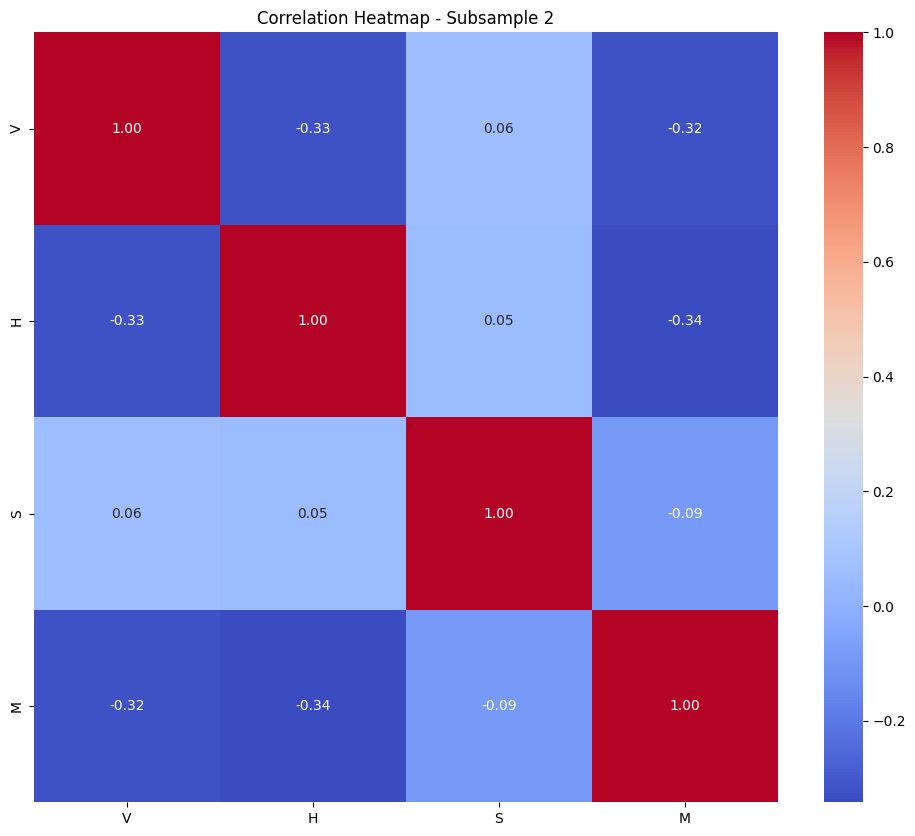

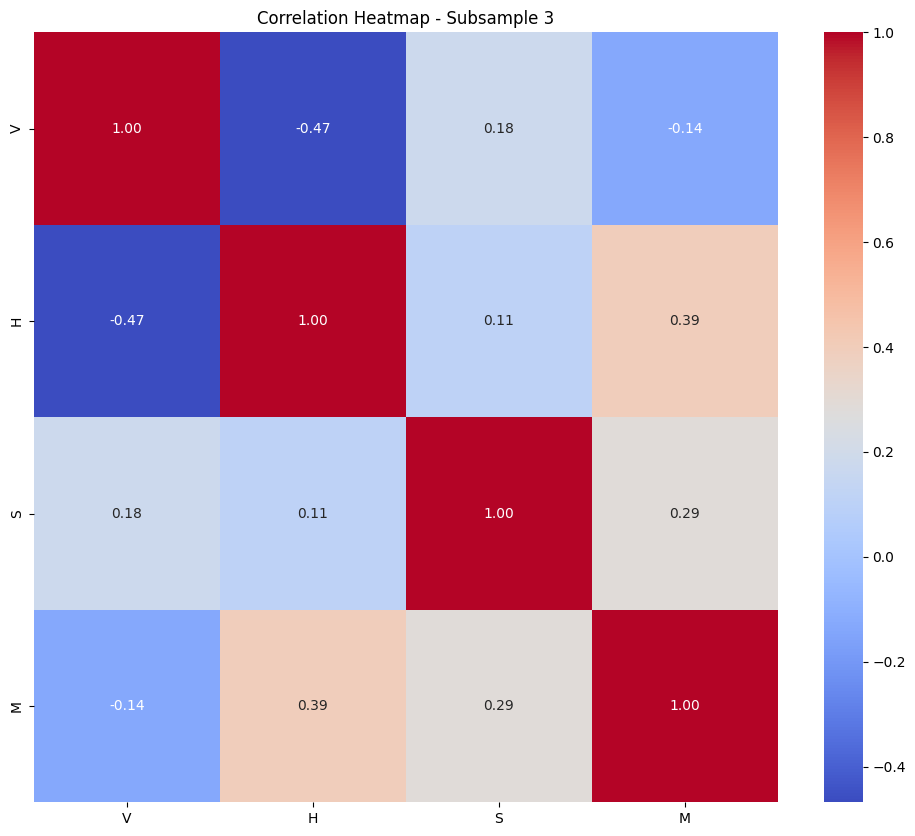

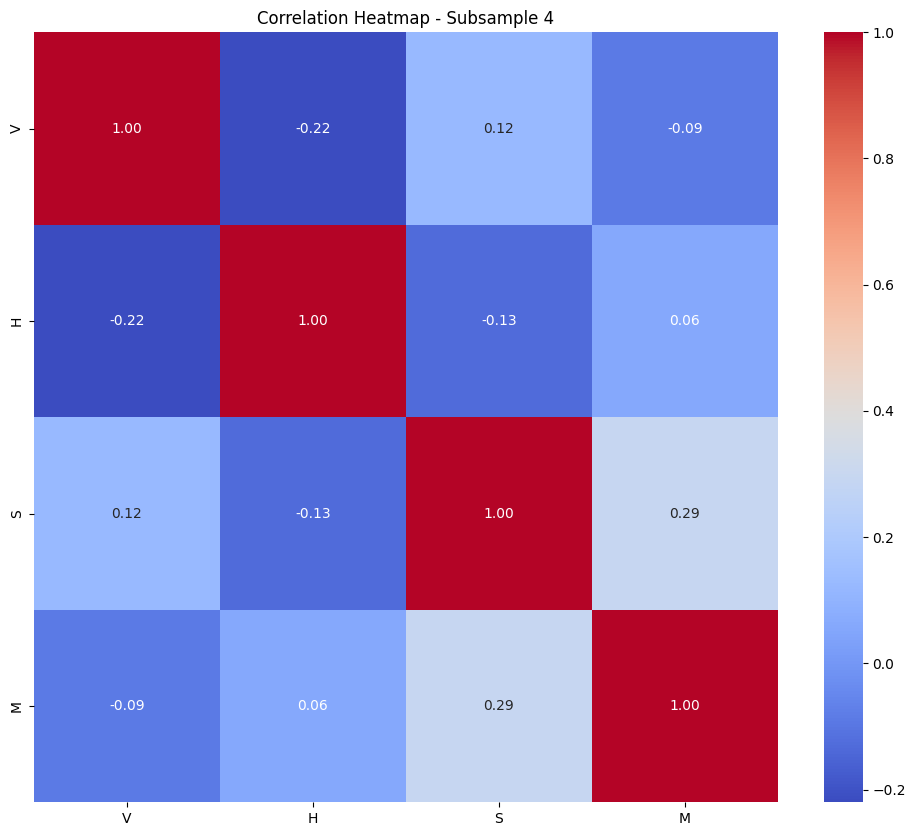

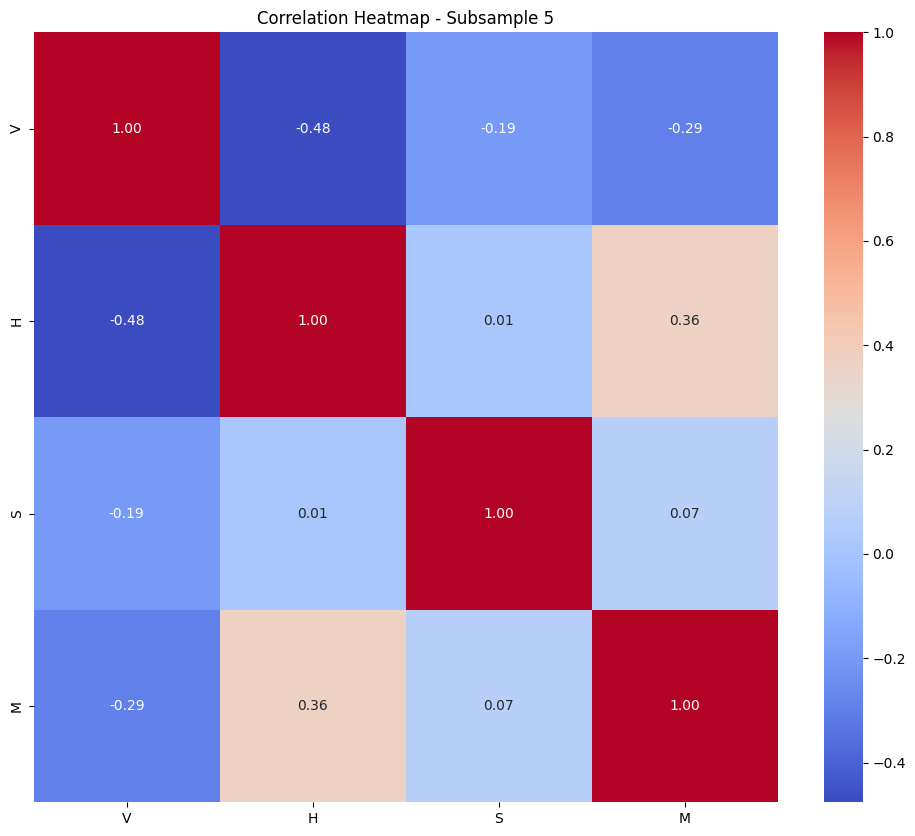

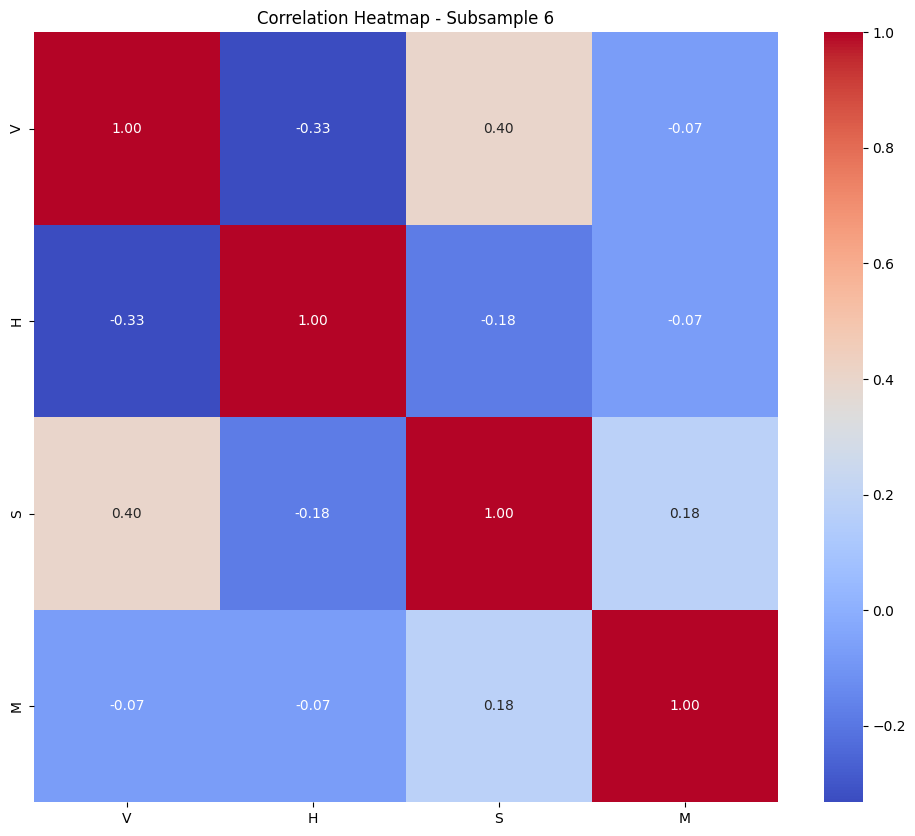

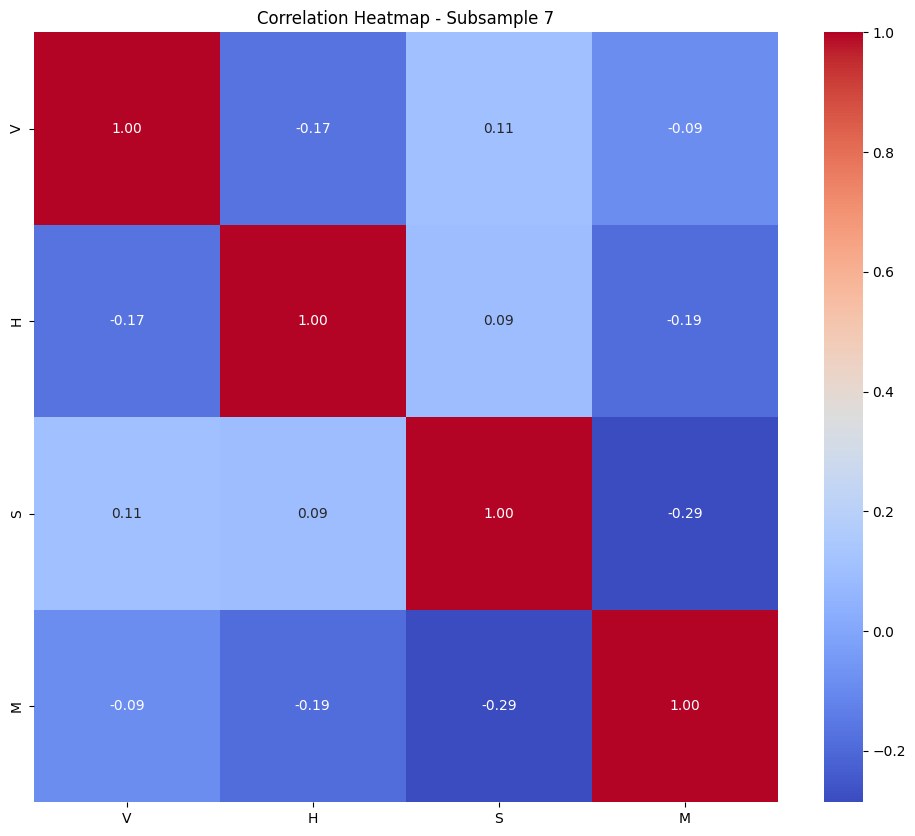

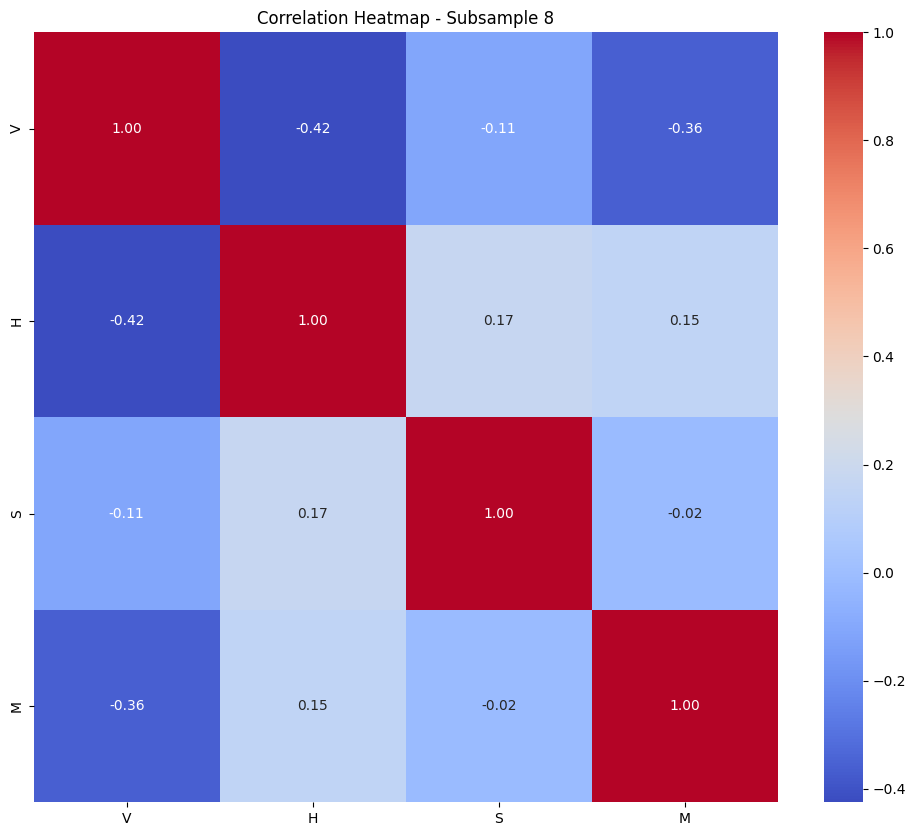

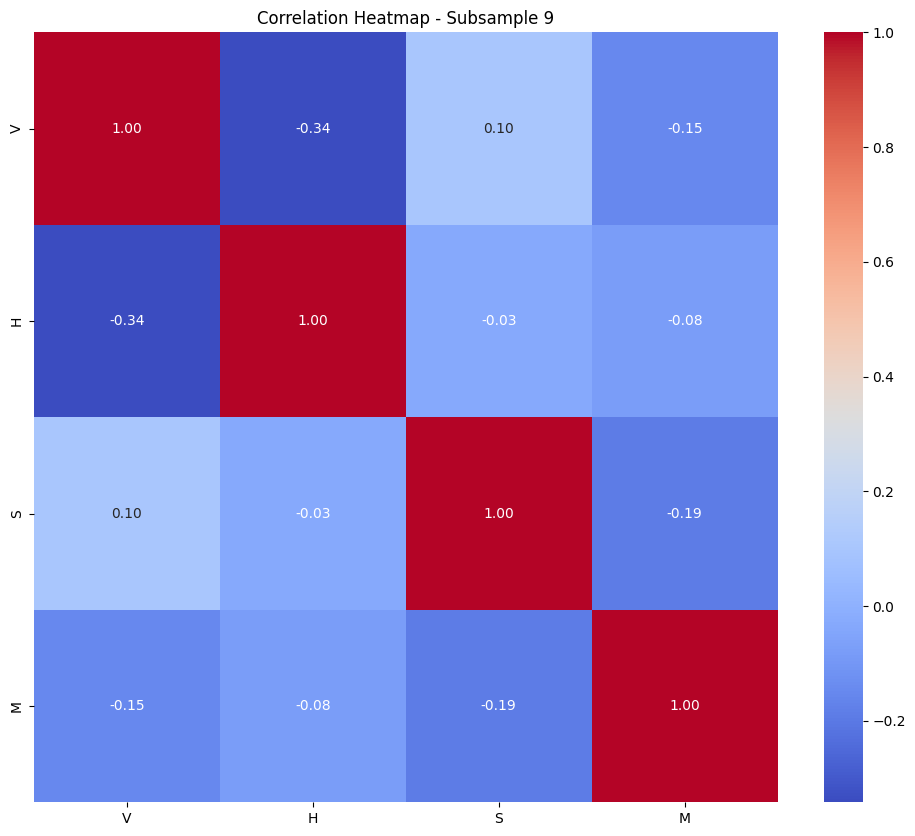

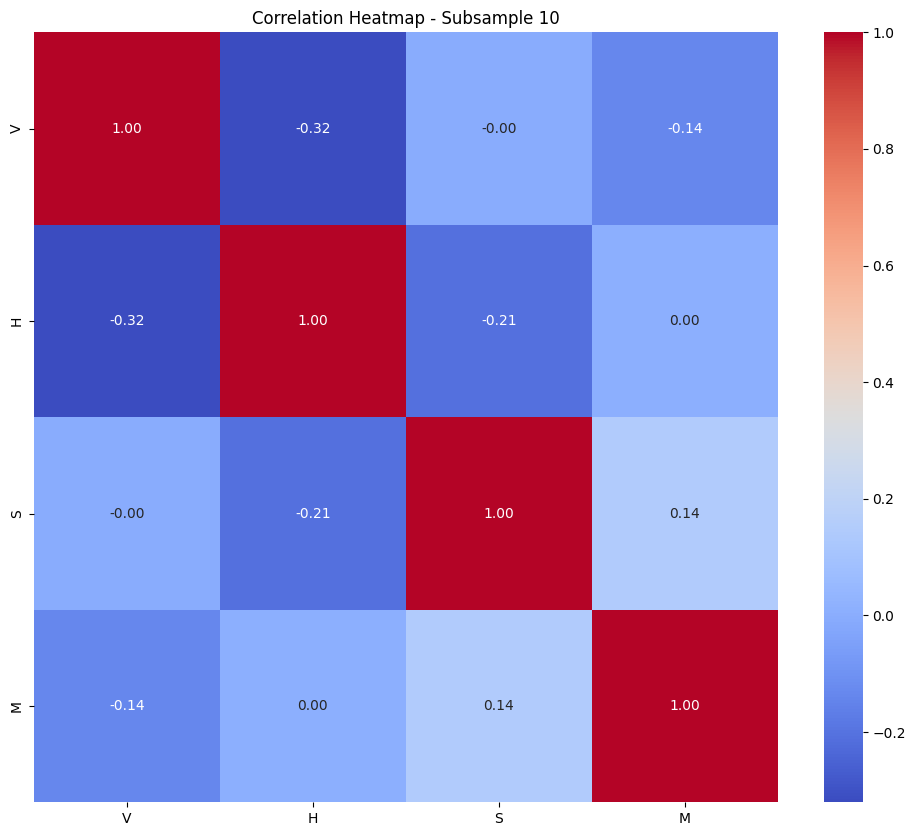

In [2]:
# Define the number of subsamples
num_subsamples = 10

# Define the size of each subsample (moderately sized)
subsample_size = len(df) // num_subsamples

# Create a list to store the correlation plots
correlation_plots = []

# Randomly select subsamples and create correlation plots
for i in range(num_subsamples):
    # Randomly select rows for the subsample
    subsample_indices = np.random.choice(df.index, size=subsample_size, replace=False)
    
    # Extract the subsample from the dataset
    subsample = df.loc[subsample_indices]
    
    # Calculate the correlation matrix for the subsample
    correlation_matrix = subsample.corr()
    
    # Plot the correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Heatmap - Subsample {i+1}')
    plt.show()


**TASK (Classification): If your problem is a classification problem visually check if the target variable is imbalanced**
**TASK (Regression): If your problem is a regression problem visually the distribution of your target variabe**

Index(['V', 'H', 'S', 'M'], dtype='object')


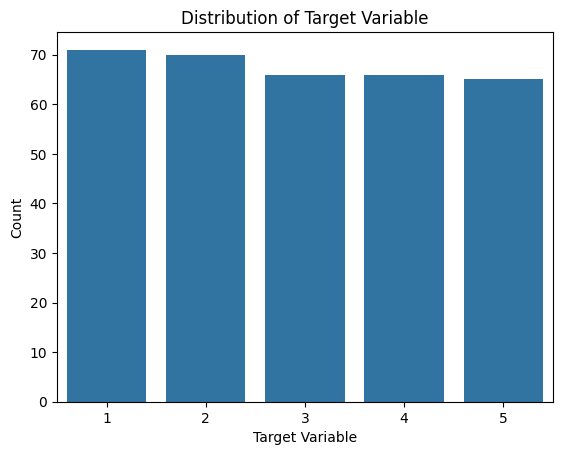

In [3]:
# Task is CLASSIFICATION

import matplotlib.pyplot as plt
import seaborn as sns

# Check the column names in your DataFrame
print(df.columns)

sns.countplot(x='M', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()

**TASK: Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable**

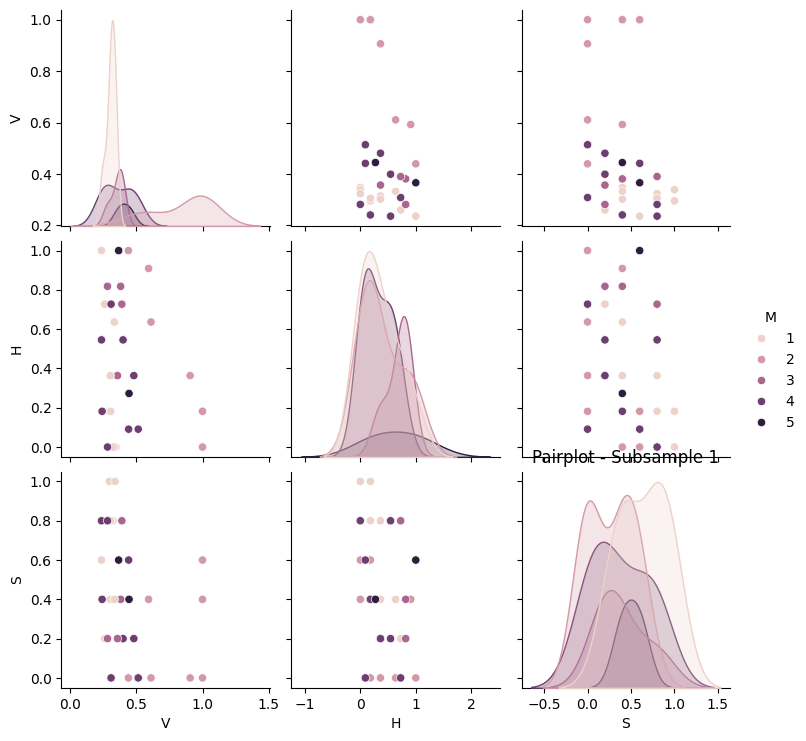

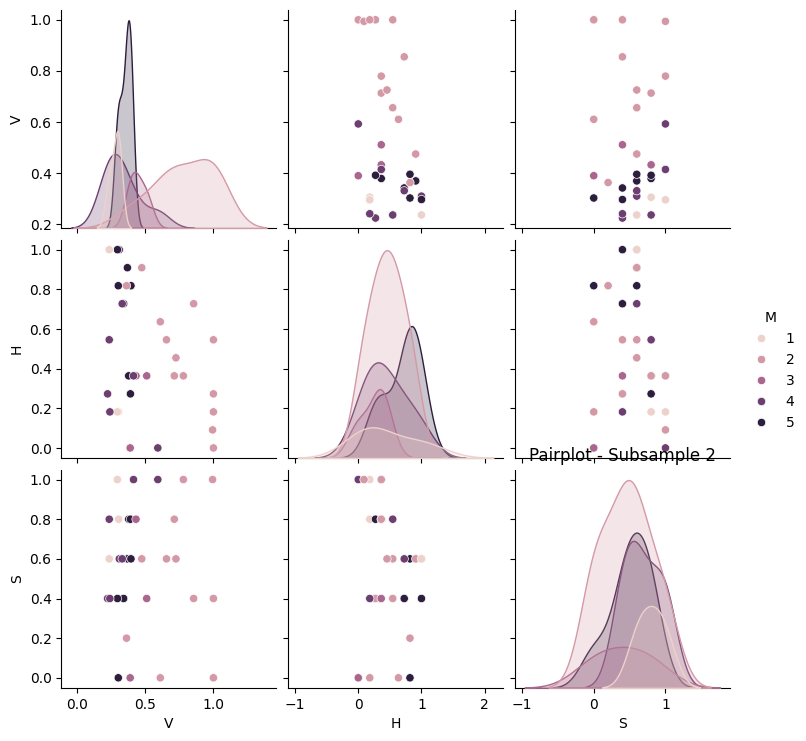

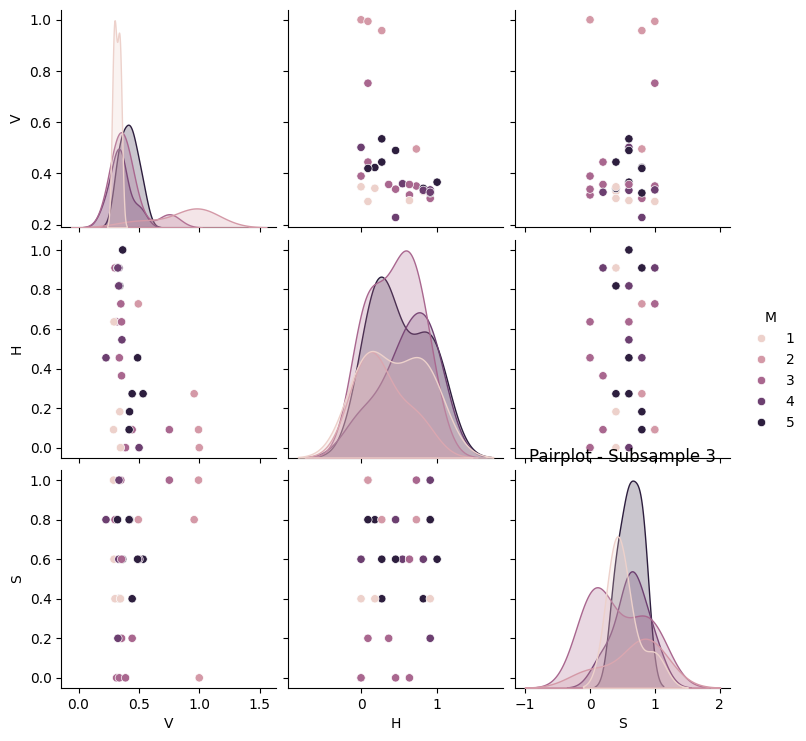

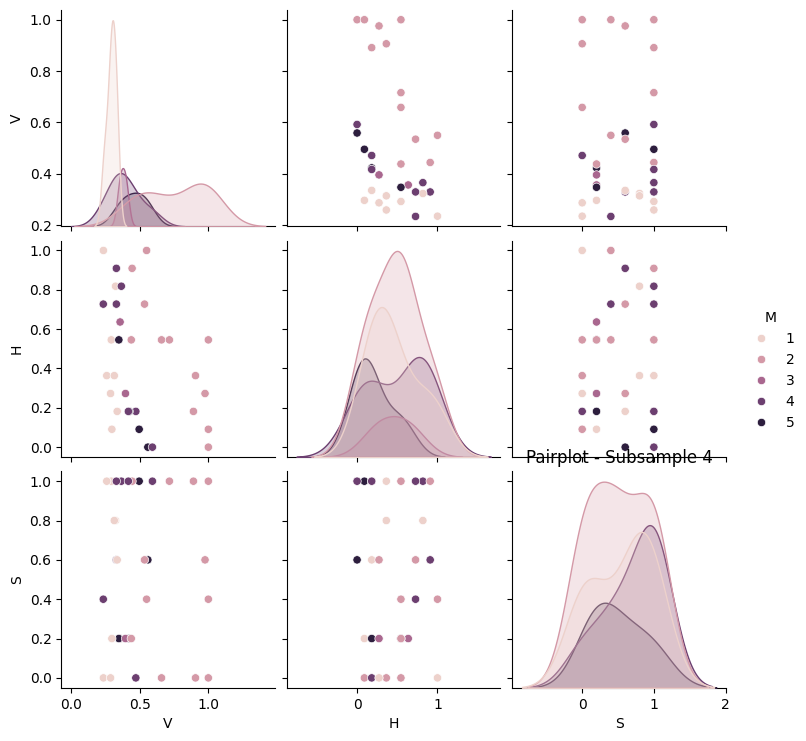

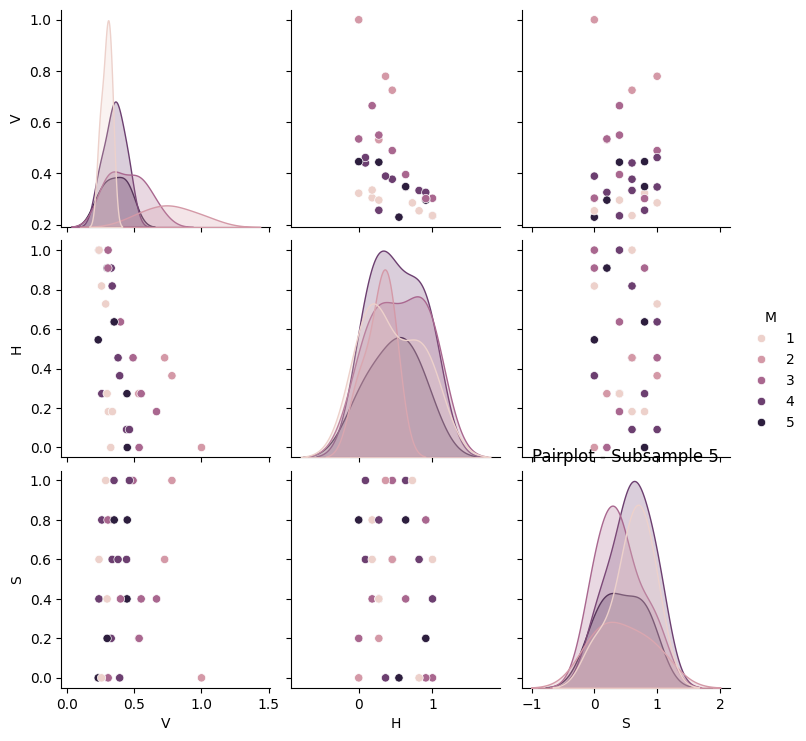

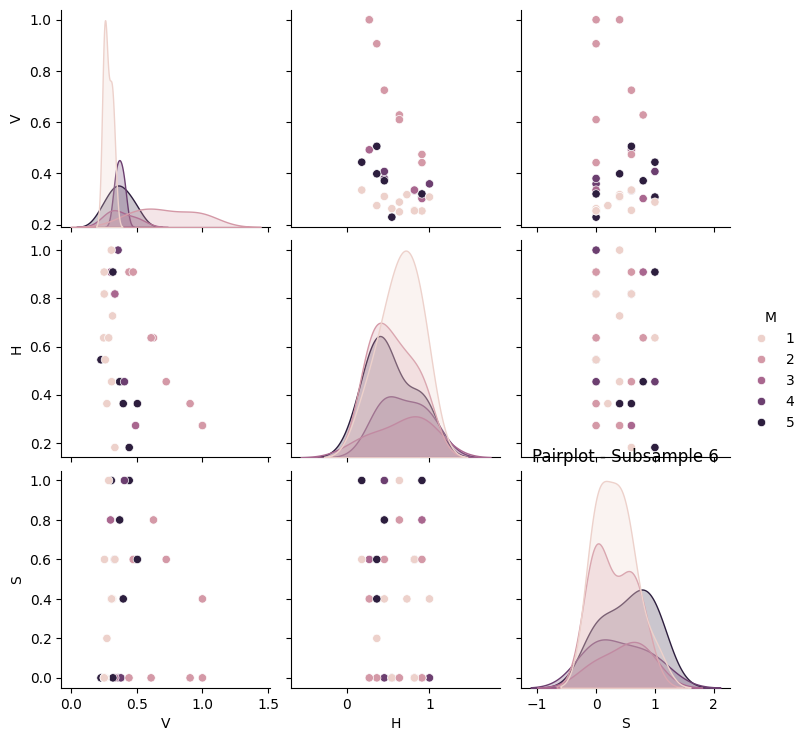

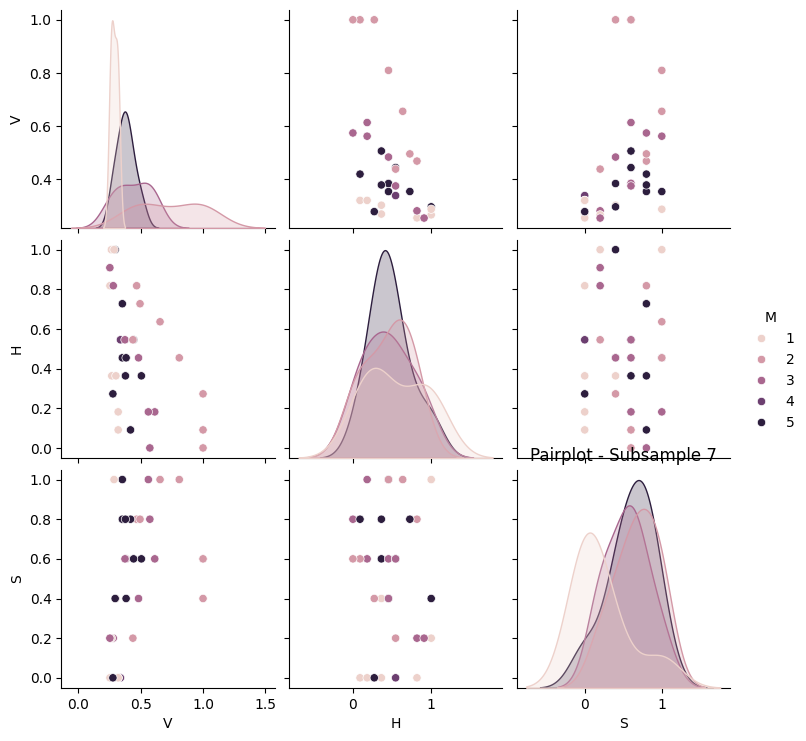

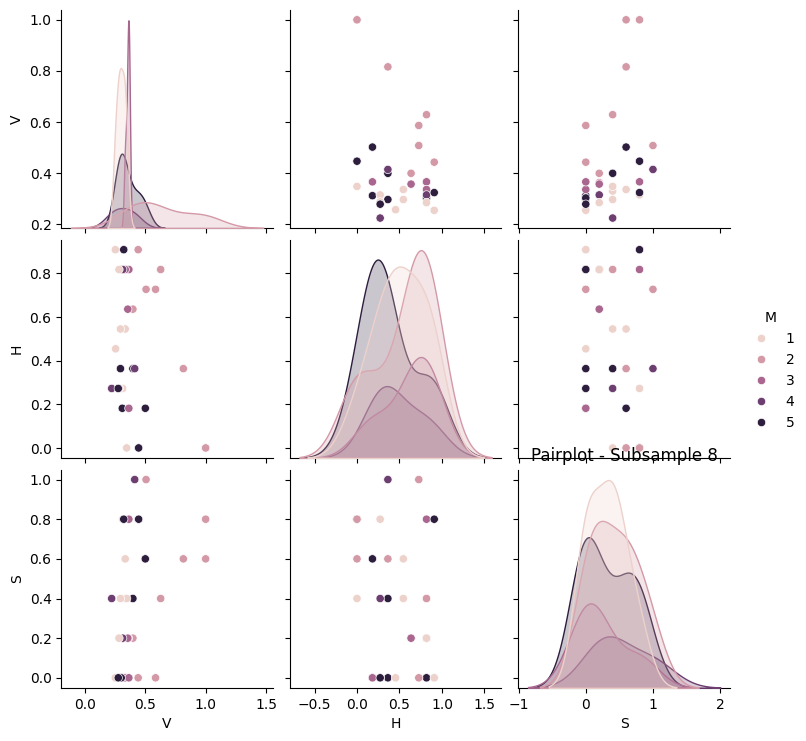

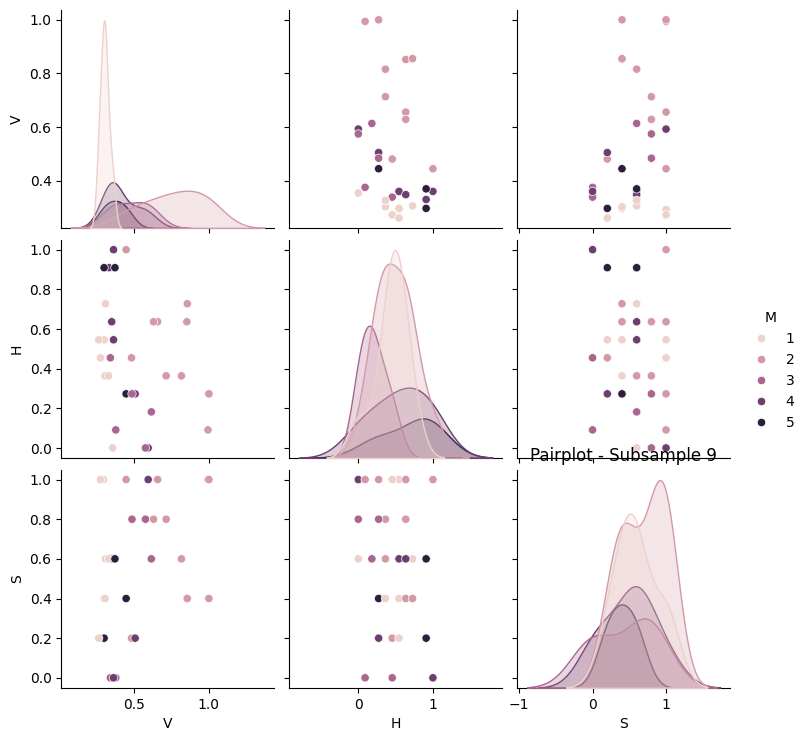

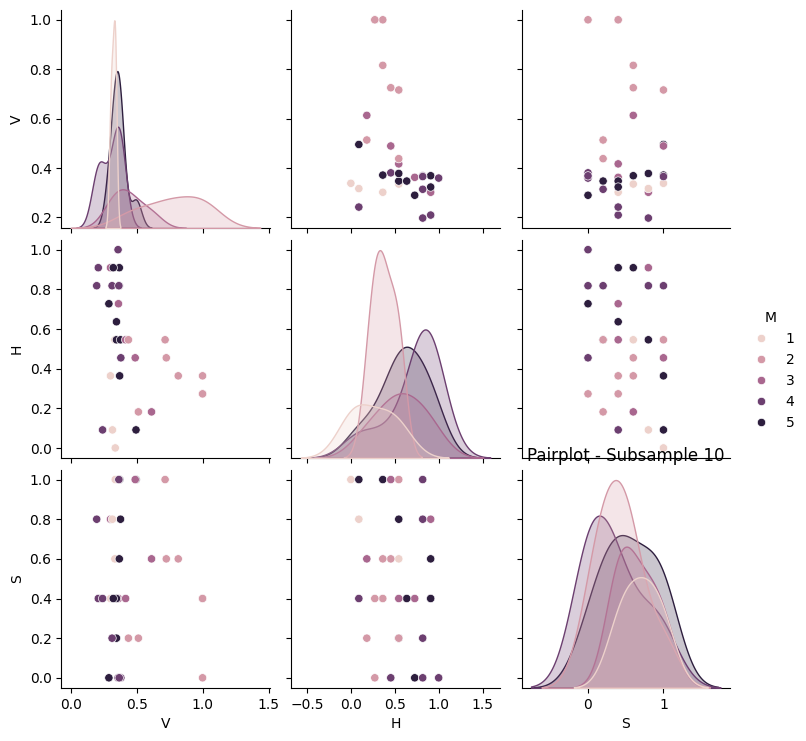

In [37]:
num_subsamples = 10
size = len(df) // num_subsamples
headers = df.columns[:-1]
target_variable = df.columns[-1]

for i in range(num_subsamples):
    subsample = df.sample(n=size)
    subsample_target = pd.concat([subsample[headers], subsample[target_variable]], axis=1)
    
    sns.pairplot(subsample_target, hue=target_variable)
    plt.title(f'Pairplot - Subsample {i+1}')
    plt.show()

**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

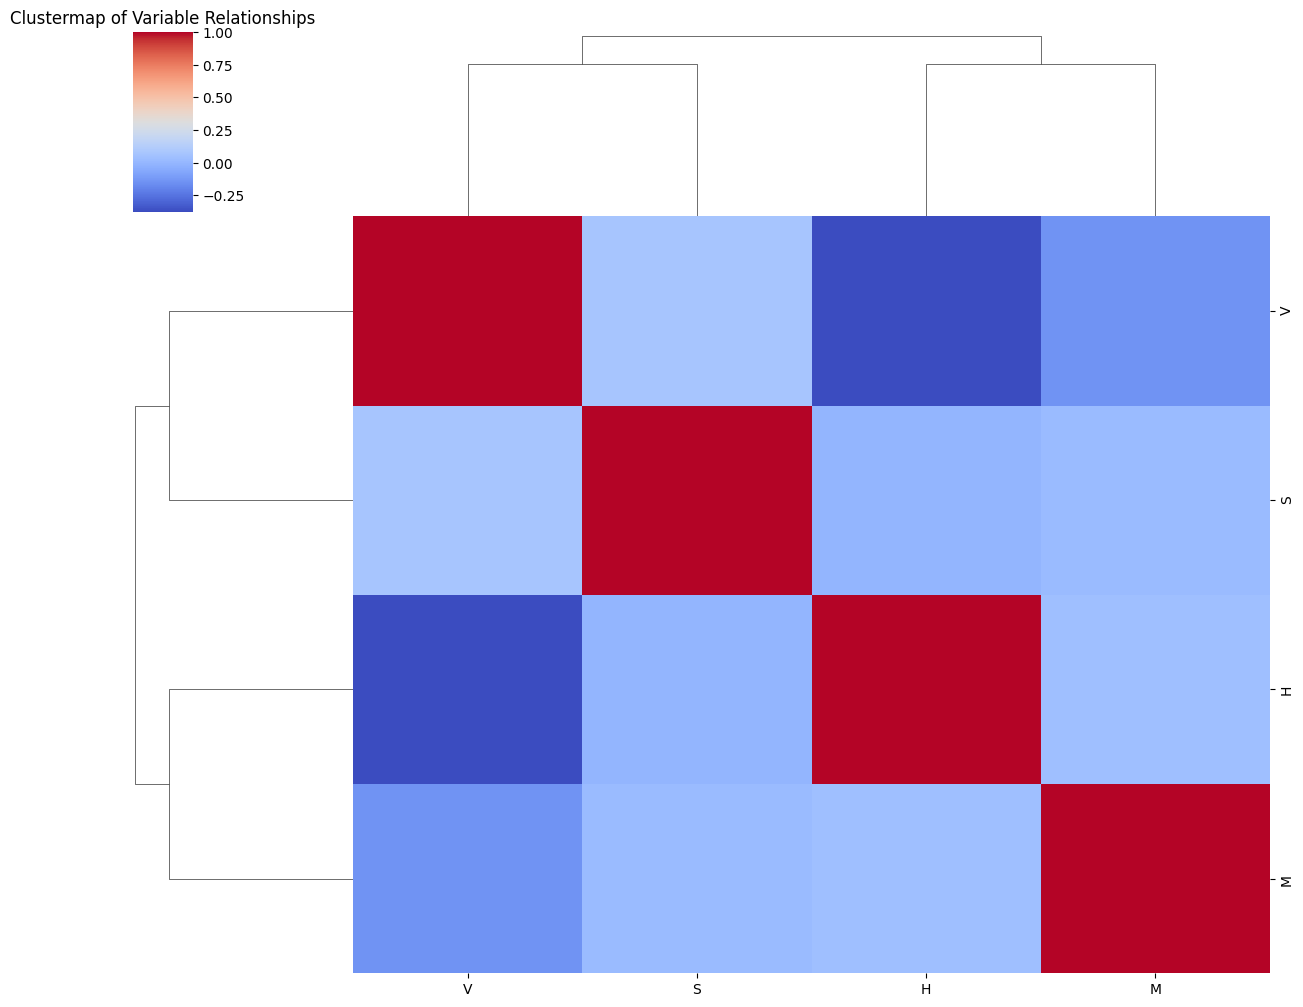

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the clustermap
sns.clustermap(df.corr(), cmap='coolwarm', figsize=(12, 10))
plt.title('Clustermap of Variable Relationships')
plt.show()

**TASK: Perform SVM modelling and check the performance of your model, improve the performance of your model using grdisearch**

In [38]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay

In [39]:
y = df['M']
X = df.drop('M',axis=1) 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [55]:
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[10,  0,  1,  0,  0],
       [ 0, 11,  0,  1,  0],
       [ 8,  0,  3,  3,  2],
       [ 5,  0,  1,  3,  2],
       [ 7,  0,  4,  5,  2]], dtype=int64)

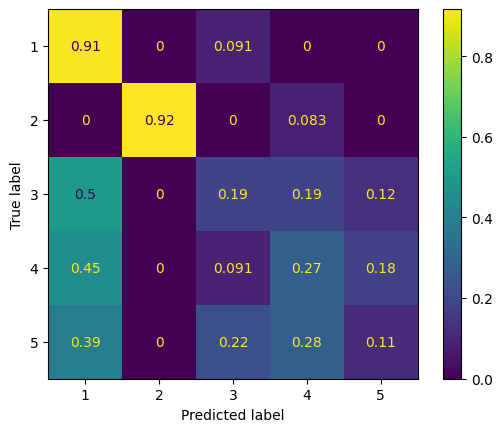

In [56]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,normalize='true')

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.33      0.91      0.49        11
           2       1.00      0.92      0.96        12
           3       0.33      0.19      0.24        16
           4       0.25      0.27      0.26        11
           5       0.33      0.11      0.17        18

    accuracy                           0.43        68
   macro avg       0.45      0.48      0.42        68
weighted avg       0.44      0.43      0.39        68



In [71]:
svm = SVC()
param_grid = {'C':[0.01, 0.05, 0.1,1],'kernel':['poly','rbf']}
grid = GridSearchCV(svm,param_grid)

In [72]:
grid.fit(X_test, y_test)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.1, 1], 'kernel': ['poly', 'rbf']})

In [73]:
y_pred = grid.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[11,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  1],
       [ 2,  0,  4,  1,  9],
       [ 3,  0,  1,  3,  4],
       [ 3,  0,  2,  1, 12]], dtype=int64)

In [74]:
print(grid.best_score_)

grid.best_params_

0.3648351648351648


{'C': 1, 'kernel': 'poly'}

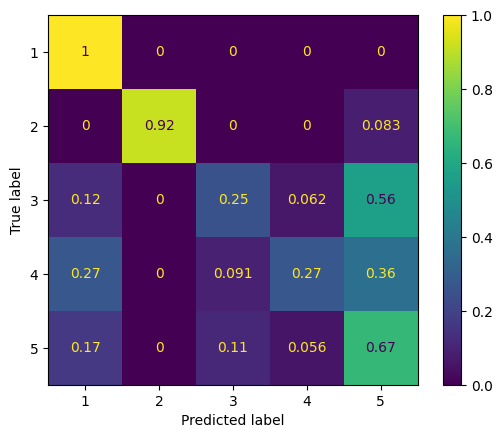

In [75]:
ConfusionMatrixDisplay.from_estimator(grid,X_test,y_test,normalize='true')

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.58      1.00      0.73        11
           2       1.00      0.92      0.96        12
           3       0.57      0.25      0.35        16
           4       0.60      0.27      0.37        11
           5       0.46      0.67      0.55        18

    accuracy                           0.60        68
   macro avg       0.64      0.62      0.59        68
weighted avg       0.62      0.60      0.57        68

